<a href="https://colab.research.google.com/github/Sarahhongqin/CISC-851-Evolutionary-Computng/blob/main/TF_readme3p_bertopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install bertopic
from IPython.display import clear_output
clear_output()

In [5]:
!pip install bertopic[vision]
from IPython.display import clear_output
clear_output()

In [6]:
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

In [12]:
data = pd.read_csv('/content/drive/MyDrive/MSR_conference/readme/root_readme_preprocess_first3p_TF.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13014 entries, 0 to 13013
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_reponame  13014 non-null  object
 1   file_name      13014 non-null  object
 2   doc_text       12992 non-null  object
dtypes: object(3)
memory usage: 305.1+ KB


In [14]:
data.isnull().sum()


user_reponame     0
file_name         0
doc_text         22
dtype: int64

In [15]:
data.dropna(subset=['doc_text'], inplace=True)
len(data)

12992

In [16]:
docs = data.doc_text.to_list()

In [17]:
topics, probs = topic_model.fit_transform(docs)

In [18]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Wiki Summary\n\nThis paper introduced the oppo...,9,9_summarization_abstractive_extractive_factual,"[summarization, abstractive, extractive, factu...",[t summarization\n\nSummarization model using ...,summarization - abstractive - extractive - fac...,0.966627,False
1,gpt chan public\n\nCode for GPT chan\n\nNote T...,10,10_gpt_neo_rugpt_chinese,"[gpt, neo, rugpt, chinese, medium, finetune, g...",[gpt\n\nfinetune gpt py\n\ntrain raw data txt ...,gpt - neo - rugpt - chinese - medium - finetun...,0.805189,False
2,Amber Heard Disinformation Operations Bots\n\n...,-1,-1_function_return_language_models,"[function, return, language, models, text, mod...",[Rapid NLP development with Databricks Delta a...,function - return - language - models - text -...,0.000000,False
3,About\n\nThe task is to restore punctuation fo...,-1,-1_function_return_language_models,"[function, return, language, models, text, mod...",[Rapid NLP development with Databricks Delta a...,function - return - language - models - text -...,0.000000,False
4,Exploring and Evaluating Attributes Values and...,-1,-1_function_return_language_models,"[function, return, language, models, text, mod...",[Rapid NLP development with Databricks Delta a...,function - return - language - models - text -...,0.000000,False
...,...,...,...,...,...,...,...,...
12987,VirusDB\n\nVirus AI platform\n\nProject signif...,13,13_ai_agora_intelligence_artificial,"[ai, agora, intelligence, artificial, robot, p...","[AI\n\nAI\n\ntorch, GopherCon Production AI wi...",ai - agora - intelligence - artificial - robot...,0.834719,False
12988,jigsaw\n\nKaggle Jigsaw Multilingual Toxic Com...,27,27_hate_toxic_offensive_memes,"[hate, toxic, offensive, memes, hateful, comme...",[A Comparative Study on NLP algorithms for Hat...,hate - toxic - offensive - memes - hateful - c...,0.855482,False
12989,SJSD Multilingual Gender Bias\n\nThis Reposito...,53,53_bias_biases_fairness_gender,"[bias, biases, fairness, gender, debiasing, ir...",[LOGAN Local Group Bias Detection by Clusterin...,bias - biases - fairness - gender - debiasing ...,0.872589,False
12990,Source code and dataset for EMNLP paper Findin...,8,8_transformers_transformer_library_pytorch,"[transformers, transformer, library, pytorch, ...","[Requirements\n\nPyTorch\n\nTransformers, tran...",transformers - transformer - library - pytorch...,0.578423,False


In [19]:
topic_model.get_topic_freq()

,Topic,Count
2,-1,4034
7,0,491
18,1,421
15,2,392
16,3,385
...,...,...
145,142,11
146,143,11
139,144,10
133,145,10


In [20]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4034,-1_function_return_language_models,"[function, return, language, models, text, mod...",[Rapid NLP development with Databricks Delta a...
1,0,491,0_deep_pytorch_onnx_tensorflow,"[deep, pytorch, onnx, tensorflow, tensorrt, le...","[deep\n\ndeep learning\n\nDescription, pytorch..."
2,1,421,1_speech_audio_wav_vec,"[speech, audio, wav, vec, music, voice, whispe...",[wav vec turkish\n\nTurkish Automated Speech R...
3,2,392,2_chatglm_chatbot_chatgpt_chat,"[chatglm, chatbot, chatgpt, chat, bot, discord...",[Python\n\nChatGLM B General Language Model GL...
4,3,385,3_bert_crf_bilstm_ner,"[bert, crf, bilstm, ner, chinese, lstm, pytorc...",[BERT Chinese NER pytorch\n\nBERT BiLSTM CRF p...
...,...,...,...,...,...
143,142,11,142_date_lasteditors_author_lihaitao,"[date, lasteditors, author, lihaitao, lastedit...",[Author lihaitao\n\nDate\n\nLastEditors Do not...
144,143,11,143_named_recognition_entity_shot,"[named, recognition, entity, shot, spanproto, ...",[Learning from Language Description Low shot N...
145,144,10,144_llama_gptq_run_qwopqwop,"[llama, gptq, run, qwopqwop, gpus, pyllama, ll...",[LLaMA Run LLM in A Single GB GPU\n\npyllama i...
146,145,10,145_product_ecommerce_shopee_kobe,"[product, ecommerce, shopee, kobe, commerce, c...",[Automatic Controllable Product Copywriting fo...


In [21]:
topic_model.get_topic(topic=-1)

[('function', 0.006867550691754511),
 ('return', 0.006732141364635367),
 ('language', 0.00600922019725858),
 ('models', 0.005667123710728268),
 ('text', 0.005545802674198078),
 ('model', 0.0053593201249023245),
 ('data', 0.0052788258202663965),
 ('code', 0.0052445311852080245),
 ('paper', 0.004876752155617968),
 ('repository', 0.004486555947128684)]

In [22]:
topic_model.get_topic(topic=0)

[('deep', 0.036519178187803904),
 ('pytorch', 0.03375189775984559),
 ('onnx', 0.020639090897172915),
 ('tensorflow', 0.017269877326761687),
 ('tensorrt', 0.016380785270288464),
 ('learning', 0.0162408289242773),
 ('torch', 0.01327257978393074),
 ('distributed', 0.011613507310939396),
 ('runtime', 0.011431882931385721),
 ('compiler', 0.010446171129277135)]

In [23]:
model = BERTopic(vectorizer_model=vectorizer_model, embedding_model="all-mpnet-base-v2").fit(docs)


In [24]:
model.get_topic_freq()

,Topic,Count
2,-1,4187
25,0,444
22,1,404
17,2,372
16,3,262
...,...,...
91,169,11
170,170,11
121,171,11
152,172,10


<Axes: xlabel='Topic'>

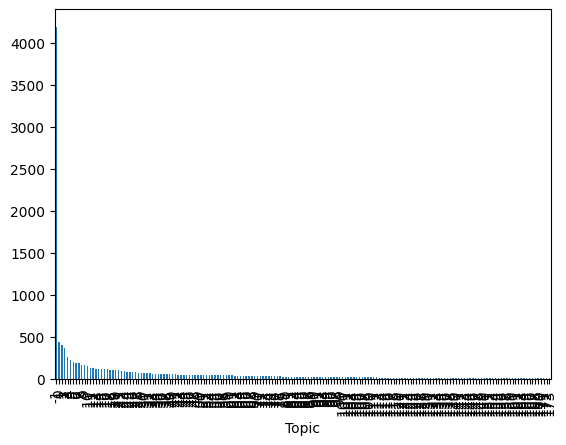

In [36]:
topic_freq = model.get_topic_freq()
topic_freq.plot(x='Topic', y='Count', kind='bar', legend=None)

In [25]:
model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Wiki Summary\n\nThis paper introduced the oppo...,8,8_summarization_abstractive_extractive_document,"[summarization, abstractive, extractive, docum...",[t summarization\n\nSummarization model using ...,summarization - abstractive - extractive - doc...,0.401682,False
1,gpt chan public\n\nCode for GPT chan\n\nNote T...,15,15_gpt_mingpt_neo_finetune,"[gpt, mingpt, neo, finetune, kogpt, db, bit, p...",[nanoGPT\n\nThe simplest fastest repository fo...,gpt - mingpt - neo - finetune - kogpt - db - b...,0.523648,False
2,Amber Heard Disinformation Operations Bots\n\n...,-1,-1_function_return_model_language,"[function, return, model, language, models, da...",[Coarse to Fine Vision Language Pre training w...,function - return - model - language - models ...,0.000000,False
3,About\n\nThe task is to restore punctuation fo...,100,100_punctuation_restoration_punctuator_itn,"[punctuation, restoration, punctuator, itn, as...",[Motivation\n\nSpeech Recognition ASR systems ...,punctuation - restoration - punctuator - itn -...,0.832527,False
4,Exploring and Evaluating Attributes Values and...,92,92_matching_entity_er_em,"[matching, entity, er, em, sudowoodo, collabor...",[Ditto Deep Entity Matching with Pre Trained L...,matching - entity - er - em - sudowoodo - coll...,0.739166,False
...,...,...,...,...,...,...,...,...
12987,VirusDB\n\nVirus AI platform\n\nProject signif...,95,95_covid_cord_coronavirus_fever,"[covid, cord, coronavirus, fever, sars, cov, c...",[Covid on the Web Dataset\n\nCovid on the Web ...,covid - cord - coronavirus - fever - sars - co...,0.618697,False
12988,jigsaw\n\nKaggle Jigsaw Multilingual Toxic Com...,24,24_hate_toxic_offensive_comments,"[hate, toxic, offensive, comments, hateful, me...",[Korean Hate Speech Classification\n\nDataset\...,hate - toxic - offensive - comments - hateful ...,0.302181,False
12989,SJSD Multilingual Gender Bias\n\nThis Reposito...,39,39_bias_biases_fairness_debiasing,"[bias, biases, fairness, debiasing, gender, ir...",[StereoSet Measuring stereotypical bias in pre...,bias - biases - fairness - debiasing - gender ...,0.622143,False
12990,Source code and dataset for EMNLP paper Findin...,0,0_language_llm_models_large,"[language, llm, models, large, llms, trained, ...",[LLM Evaluation\n\nThis project aims to evalua...,language - llm - models - large - llms - train...,1.000000,False


In [26]:
document_info = model.get_document_info(docs)
document_info.to_csv('TF_document_info.csv')

In [27]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4187,-1_function_return_model_language,"[function, return, model, language, models, da...",[Coarse to Fine Vision Language Pre training w...
1,0,444,0_language_llm_models_large,"[language, llm, models, large, llms, trained, ...",[LLM Evaluation\n\nThis project aims to evalua...
2,1,404,1_speech_audio_wav_vec,"[speech, audio, wav, vec, music, voice, whispe...",[wav vec live japanese translator\n\nReal time...
3,2,372,2_bert_crf_bilstm_pytorch,"[bert, crf, bilstm, pytorch, ner, base, py, ca...",[BERT\n\nThe source code and dataset about BER...
4,3,262,3_chatbot_bot_chat_chatgpt,"[chatbot, bot, chat, chatgpt, discord, telegra...","[BOT, ChatGPT at Home\n\nChatGPT Home Large La..."
...,...,...,...,...,...
170,169,11,169_headline_news_misinfo_framing,"[headline, news, misinfo, framing, pens, frame...",[Russian News lustering and Headline Generatio...
171,170,11,170_date_lasteditors_author_lihaitao,"[date, lasteditors, author, lihaitao, lastedit...",[Author lihaitao\n\nDate\n\nLastEditors Do not...
172,171,11,171_megatron_large_scale_flexgen,"[megatron, large, scale, flexgen, gpu, gather,...",[GPT NeoX\n\nThis repository records EleutherA...
173,172,10,172_flask_app_react_cellstrat,"[flask, app, react, cellstrat, adminlte, readi...",[A Flask Web App for summarizing readings\n\nQ...


In [28]:
topic_info = model.get_topic_info()

In [29]:
topic_info.to_csv('TF_topic_info.csv')

In [30]:
model.get_topic(topic=-1)

[('function', 0.00613915794522143),
 ('return', 0.0060619691281651915),
 ('model', 0.004569590197570043),
 ('language', 0.004555893379345634),
 ('models', 0.004494373672615808),
 ('data', 0.004404245741003521),
 ('text', 0.004265945978675876),
 ('paper', 0.004179059850918323),
 ('code', 0.004127058257493656),
 ('var', 0.004059565992723035)]

In [31]:
model.get_topic(topic=0)

[('language', 0.022596008577482878),
 ('llm', 0.016781655458111486),
 ('models', 0.015338989594074271),
 ('large', 0.014285908667664183),
 ('llms', 0.013773612484159842),
 ('trained', 0.009758650622609324),
 ('pre', 0.009752406272462903),
 ('multilingual', 0.008877505712637528),
 ('model', 0.00869239663337564),
 ('tuning', 0.008686267637779105)]

In [32]:
model.visualize_topics()

In [33]:
model.visualize_barchart()

In [34]:
topic_model.visualize_barchart()

In [35]:
model.visualize_hierarchy()